In [1]:
import numpy as np

import gaii_cond_linear
import var
import visualize
import matplotlib.pyplot as plt

def get_state_list():
    A = np.array([[0.03, 0.8], [0.8, 0.03]])
    Sigma = np.array([[0.2, 0.1], [0.1, 0.2]])
    initiali_state = np.random.multivariate_normal(
        [0, 0], [[0.1, 0], [0, 0.1]], size=1
    )[0]
    return var.generate(initiali_state, A, Sigma, N=1000)

In [ ]:
N = 2
mask_p = np.ones((N, N))
state_list = get_state_list()
model = gaii_cond_linear.fit_q(state_list, mask_p, debug=True)

plt.plot(state_list)
visualize.imshow(model)
#visualize.simulate(model)

Generator(
  (fc1): MaskedLinear(in_features=2, out_features=2)
  (fc2): MaskedLinear(in_features=2, out_features=2)
)
Discriminator(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)
[Count 0/2000]    [JS: -0.114582] [G loss: -0.106815] [D loss: 0.114582]
[[0.35633314 0.        ]
 [0.         0.1164493 ]]
[[0.00067312 0.00350153]
 [0.00350153 0.03486341]]
[Count 100/2000]    [JS: -0.058977] [G loss: -0.058726] [D loss: 0.058977]
[Count 200/2000]    [JS: -0.029067] [G loss: -0.024540] [D loss: 0.029067]
[Count 300/2000]    [JS: -0.009632] [G loss: -0.010705] [D loss: 0.009632]
[Count 400/2000]    [JS: -0.002451] [G loss: -0.002592] [D loss: 0.002451]
[Count 500/2000]    [JS: 0.001717] [G loss: 0.005389] [D loss: -0.001717]
[Count 600/2000]    [JS: 0.017934] [G loss: 0.019821] [D loss: -0.017934]
[Count 700/2000]    [JS: 0.015605] [G loss: 0.043876] [D loss: -0.015605]
[Count 800/2000]    [JS: 0.058478] [G loss: 0.040

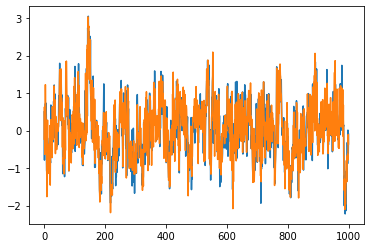

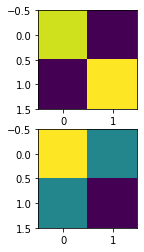

In [3]:
N = 2
mask_q = np.eye(N, N)
state_list = get_state_list()
model_q = gaii_cond_linear.fit_q(state_list, mask_q, debug=True)

plt.plot(state_list)
visualize.imshow(model_q)

# 実験

Detecting Causality in Multivariate Time Series via Non-Uniform Embedding

https://www.sciencedirect.com/science/article/pii/S0031320320303289?via%3Dihub

Linear Multivariate Stochastic Process

$$
\begin{cases}
x_{1,t} = 0.4x_{1,t−1} − 0.5x_{1,t−2} + 0.4x_{5,t−1} + e_{1,t} \\
x_{2,t} = 0.4x_{2,t-1} - 0.3x_{1,t-4} + 0.4x_{5, t-2} + e_{2,t} \\
x_{3,t} = 0.5x_{3,t-1} - 0.7x_{3,t-2} - 0.3x_{5, t-3} + e_{2,t} \\
x_{4,t} = 0.8x_{4,t-3} + 0.4x_{1,t-2} + 0.3x_{2, t-2} + e_{2,t} \\
x_{5,t} = 0.7x_{5,t-1} - 0.5x_{5,t-2} + 0.4x_{4, t-1} + e_{2,t}
\end{cases}
$$

Nonlinear Multivariate Stochastic Process
$$
\begin{cases}
t_{1,t} = 3.4 x_{1,t-1}(1-x^2_{1,t-1})e^{-x^2_{1,t-1}} + 0.4e_{1,t} \\
t_{2,t} = 3.4 x_{2,t-1}(1-x^2_{2,t-1})e^{-x^2_{2,t-1}} + 0.5x_{1,t-1}x_{2,t-1} + 0.4e_{1,t} \\
t_{3,t} = 3.4 x_{3,t-1}(1-x^2_{3,t-1})e^{-x^2_{3,t-1}} + 0.3x_{2,t-1} + 0.5x^2_{1,t-1}+ 0.4e_{1,t}
\end{cases}
$$

Coupled Henon Maps
$$　
\begin{cases}
x_{1,t} = 1.4 − x_{1,t−1}^2 + 0.3x_{1,t−2} \\
x_{i,t} = 1.4−(Cx_{i−1,t−1} +(1−C)x_{i,t−1})^2 +0.3x_{i,t−2} \text{ for } i = 2, ...,K
\end{cases}
$$

Coupled Lorenz System


In [ ]:
def coupled_henon_maps(n = 1024, K = 3, C = 0.3):
    x = np.zeros((K, n))
    x[0, 0] = 0
    x[0, 1] = 0
    for t in range(2, n):
        x[0, t] = 1.4 - x[0, t-1]**2 - 0.3 * x[0, t-2]
    for i in range(1, K):
        for t in range(2, n):
            x[i, t] = 1.4 - (C * x[i - 1, t - 1] + (1 - C) * x[i, t - 1]) + 0.3 * x[i, t - 2]
    return np.array(x).T

def create_data():
    N = 3
    state_list = coupled_henon_maps()
    SigmaX = np.cov(state_list.T)

    ar = VAR(state_list).fit(trend="n", maxlags=1)
    initiali_state = np.random.multivariate_normal([0] * N, np.eye(N,N) * 0.01, size=1)[0]
    state_list = var.generate(initiali_state, ar.params, ar.sigma_u, N=10000)
    return {
        "N": N,
        "A": ar.params,
        "SigmaE": ar.sigma_u,
        "SigmaX": SigmaX,
        "state_list": state_list,
        "mask": np.eye(N, N),
        "MI": 1 / 2 * np.log(det(SigmaX) / det(ar.sigma_u))
    }
data = create_data()
import mip
import gaii_cond_linear
import geoii
import pandas as pd
from IPython.display import display

N = data["N"]
candidate_masks, candidate_list = mip.generate_masks(set(range(N)))
result = []
for mask in candidate_masks:
    model_gaii = gaii_cond_linear.fit_q(data["state_list"], mask)
    gaii_result = model_gaii["js"]

    model_geoii = geoii.fit_q(data["A"], data["SigmaE"], data["SigmaX"], mask)
    geoii_result = model_geoii["kl"]

    MI = data["MI"]
    print((MI, gaii_result, geoii_result))
    result.append((MI, gaii_result, geoii_result))

result = pd.DataFrame(result, columns=["MI", "gaii", "geoii"], index=candidate_list)
display(result)
ax = result.plot()
ax.tick_params(axis='x', rotation=70)
ax